In [ ]:
import rasterio as rio
import geopandas as gpd
from rasterio import features
from rasterio.enums import MergeAlg
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read in vector
vector = gpd.read_file(r"/content/drive/MyDrive/Arecanut area estimate/gubi_final_lulc/gubi_final_lulc.shp")

# Get list of geometries for all features in vector file
geom = [shapes for shapes in vector.geometry]

# Open example raster
raster = rio.open("/content/drive/MyDrive/Arecanut area estimate/Data/fcc_3.tif")

In [ ]:
mapping = {
    'Agricultural land': 1,
    'Arecanut': 2,
    'Built-up': 3,
    'Coconut': 4,
    'Crop land': 5,
    'Fallow land': 6,
    'Forest': 7,
    'Mango': 8,
    'Others': 9,
    'Plantation': 10,
    'Tree clade area': 11,
    'Wastelands': 12,
    'Water bodies': 13,
    'Wetlands': 14,
    None: 0
}


In [ ]:
vector['Lc_category_numeric'] = vector['LC_categor'].map(mapping)

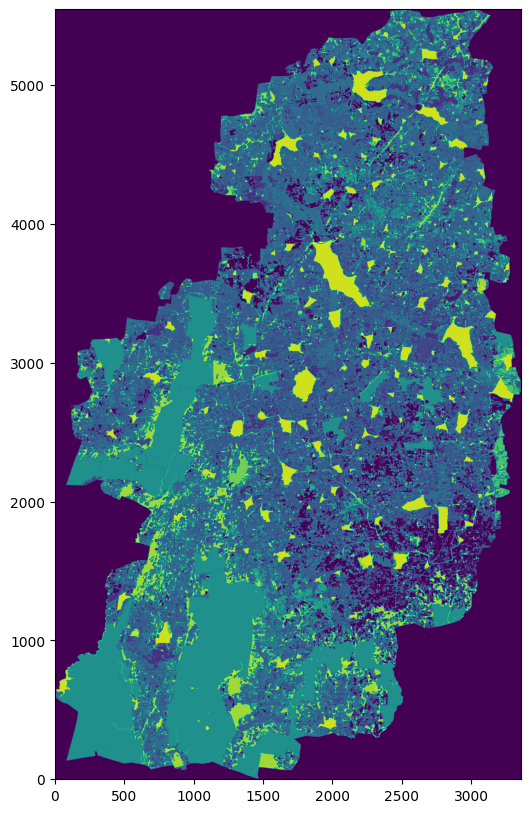

In [ ]:
geom_value = ((geom,value) for geom, value in zip(vector.geometry, vector['Lc_category_numeric']))

# Rasterize vector using the shape and transform of the raster
rasterized = features.rasterize(geom_value,
                                out_shape = raster.shape,
                                transform = raster.transform,
                                all_touched = True,
                                fill = 0,   # background value
                                merge_alg = MergeAlg.replace,
                                dtype = np.int16)

# Plot raster
fig, ax = plt.subplots(1, figsize = (10, 10))
show(rasterized, ax = ax)
plt.gca().invert_yaxis()

In [ ]:
np.unique(rasterized)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int16)

In [ ]:
with rio.open(
        "/content/drive/MyDrive/Arecanut area estimate/Data/rasterized_gubi_lulc1.tif", "w",
        driver = "GTiff",
        crs = raster.crs,
        transform = raster.transform,
        dtype = rio.uint8,
        count = 1,
        width = raster.width,
        height = raster.height) as dst:
    dst.write(rasterized, indexes = 1)